----------
Qandli diabet kasalligiga tashxis qo'yish
---------------

Quyidagi ma'lumotlar to'plami Hindistonning *Qandli diabet* va *buyrak kasalliklari* milliy institutidan olingan. Maqsad diagnostik o'lchovlar asosida bemorda diabet bor-yo'qligini taxmin qilishimiz kerak.

Biz Bu datasetni **CRISP-DM metodologiyasi** asosida o'rganamiz.

1. Faoliyatni o'rganish.
    a) Jarayonlarni tushunish:
        Model shu paytgacha qandli diabetga chalingan odamlarni malumotlarini ishlatib, shu malumotlar asosida diabet bor-yo'qligini bashorat qilish kerak.
        
    b)  ML turini tanlash:
        < Supervised
        Unsupervised
        Reinforsement Learning
        Javob: Supervised >

        Alogritmni tanlash:
        < Klassification
        Regression
        Klashterlash 
        Javob: Klassification >

        Usul(Malumotlarni kirishi doimiymi yoki bir martalikmi):
        < Online
          Offline
          Javob: Offline >

Bizga kerakli kutubxonalarni chaqirib olamiz

In [125]:
import pandas as pd
import numpy as np

Datasetni yuklab olamiz

In [126]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Tarkib**:

Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.

**Ustunlar**:

**Pregnancies**: homilador bo'lish soni

**Glucose**: glyukozaga test natijasi

**BloodPressure**: diastolik qon bosimi (mm Hg)

**SkinThickness**: Triceps teri burmasining qalinligi (mm)

**Insulin**: 2 soatlik sarum insulini (mu U/ml)

**BMI**: Tana massasi indeksi (vazn kg / (m bo'yi) ^ 2)

**DiabetesPedigreeFunction**: diabetning naslchilik funktsiyasi

**Age**: Yosh (yil)
**Outcome**: Class (0 - diabet yo'q, 1 - diabet)

Boshida bizga kerakli ustun **Outcome** qiymatlari standartlashmagan edi. Men ularni bazi qiymatlarini o'chirib standartlashtirdim

In [127]:
"""# 0 qiymatlardan faqat 200 tasini o'chirib tashlash
zeros_count = df['Outcome'].value_counts()[0]  # 0 qiymatlarning umumiy sonini hisoblash
if zeros_count == 500:  # Agar 0 qiymatlarning umumiy soni 500 dan ko'p bo'lsa
    zeros_to_remove = 200  # O'chiriladigan 0 qiymatlarining soni
    removed_count = 0  # O'chirilgan 0 qiymatlarining hisoblovchi o'zgaruvchi

    # DataFrame ichidagi 0 qiymatlarini 200 tasini o'chirib tashlash
    for index, row in df.iterrows():
        if row['Outcome'] == 0:
            df.drop(index, inplace=True)
            removed_count += 1
            if removed_count == zeros_to_remove:
                break"""

"# 0 qiymatlardan faqat 200 tasini o'chirib tashlash\nzeros_count = df['Outcome'].value_counts()[0]  # 0 qiymatlarning umumiy sonini hisoblash\nif zeros_count == 500:  # Agar 0 qiymatlarning umumiy soni 500 dan ko'p bo'lsa\n    zeros_to_remove = 200  # O'chiriladigan 0 qiymatlarining soni\n    removed_count = 0  # O'chirilgan 0 qiymatlarining hisoblovchi o'zgaruvchi\n\n    # DataFrame ichidagi 0 qiymatlarini 200 tasini o'chirib tashlash\n    for index, row in df.iterrows():\n        if row['Outcome'] == 0:\n            df.drop(index, inplace=True)\n            removed_count += 1\n            if removed_count == zeros_to_remove:\n                break"

Jadvaldagi ustunlar bir-biri bilan qanday correlatsiyaga ega ekanlini tekshirib ko'ramiz

In [128]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Endi **Outcomme** ustuni asosiy ustun bo'lganligi uchun shu ustunni boshqa ustunlar bilan korrelatsiyasini ko'ramiz

In [129]:
df.corrwith(df["Outcome"]).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

Endi shu ustunda qiymalar sonini ko'ramiz

In [130]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Navbat, shu **df** jadvalini 2 ta qismga ajratib olamiz. Sababi biz modelga o'qitishimiz kerak

In [131]:
X = df.drop('Outcome', axis=1).values
Y = df['Outcome']

**X** jadvalini Standardlashtirib olamiz, negaki Biz hisoblashimizga osonroq bo'ladi

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

**kNN (k-nearest neighbors)** modeli, qo'llanuvchi tomondan mahalliy ustunlarni taxmin qilish uchun ishlatiladigan oddiy va eng oson modellar biri hisoblanadi. Bu, sinfi va regressiya maqsadlariga muvofiq ishlatilishi mumkin bo'lgan alohida bir algoritmdir.

In [133]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.14, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15) # k-ni qiymati

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=15)

Biz tepadagi model orqali bashorat qilamiz

In [134]:
Y_predict = knn.predict(X_test)

---------
Baholash:
Jaccard index
------

In [135]:
from sklearn.metrics import jaccard_score

jaccard_score(Y_test, Y_predict)

0.6590909090909091

Confusion matrix o'lchovlari quyidagi tartibda bo'ladi:

*True Positive (TP)*: Model tomonidan to'g'ri aniqlangan va haqiqiy sinflarga mos keluvchi obyektlar soni.

*True Negative (TN)*: Model tomonidan noto'g'ri aniqlangan va haqiqiy sinflarga mos kelmaydigan obyektlar soni.

*False Positive (FP)*: Model tomonidan to'g'ri aniqlangan deb bildirilgan, lekin haqiqatda noto'g'ri aniqlangan obyektlar soni.

*False Negative (FN)*: Model tomonidan noto'g'ri aniqlangan deb bildirilgan, lekin haqiqatda to'g'ri aniqlangan obyektlar soni.

---------------
Agar 0 ni negativ va 1 ni pozitiv sinf deb olib qarasa, matritsaning quyidagi shaklidagi ko'rinishi:

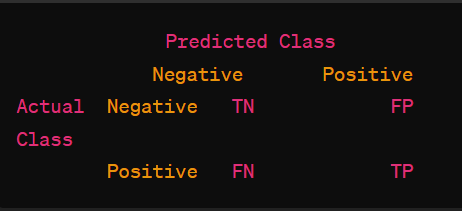

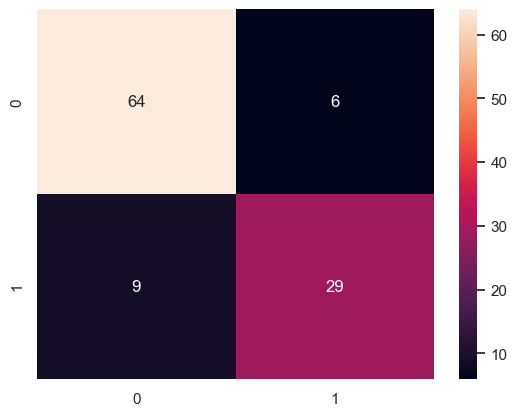

In [136]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(Y_test, Y_predict), annot=True)
plt.show()

Biz ishlatgan model qanchalik yaxshi ekanligini *Precision, recall, F1* kutubxonalari orqali tekshirib olishimiz mumkin

1 soniga qanchalik yaqin bo'lsa Natijamiz shunchalik aniq ishlayotganini bildiradi

In [137]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
accuracy = accuracy_score(Y_test, Y_predict)

print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.8285714285714286
recall=0.7631578947368421
f1=0.7945205479452054
accuracy=0.8611111111111112


Cross-validation yordamida tekshiramiz

Bunda **Outcome** (0 - diabet yo'q, 1 - diabet) qiymatlari *Precision, recall, F1* baholash algoritmilari bilan aniqligini chiqarib beradi

In [138]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = Y, cv = 4)

from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(Y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       500
           1       0.71      0.52      0.60       268

    accuracy                           0.76       768
   macro avg       0.74      0.70      0.71       768
weighted avg       0.75      0.76      0.75       768



***kNN (k-nearest neighbors)*** modelini qiymatini biz tepada ixtiyoriy olishimiz mumkin.
Keyin shu yergacha kelganimizdan keyin k-ni qiymatini for amali yordamida k  ga har-xil qiymatlarni berib ko'ramiz.
Eng Baland cho'qqiga ega bo'lgan x vektoridagi qiymat bizga kerakli qiymat bo'ladi. Va shu qiymatni teparoqdagi k ni o'rniqa olib borib qo'ysak, eng yaxshi natijani olishimiz mumkin.
(k-ni qiymatini ustunlari sonini ham qo'ysa deyarli yaxshiroq natijani beradi, keyin unchalik emas)

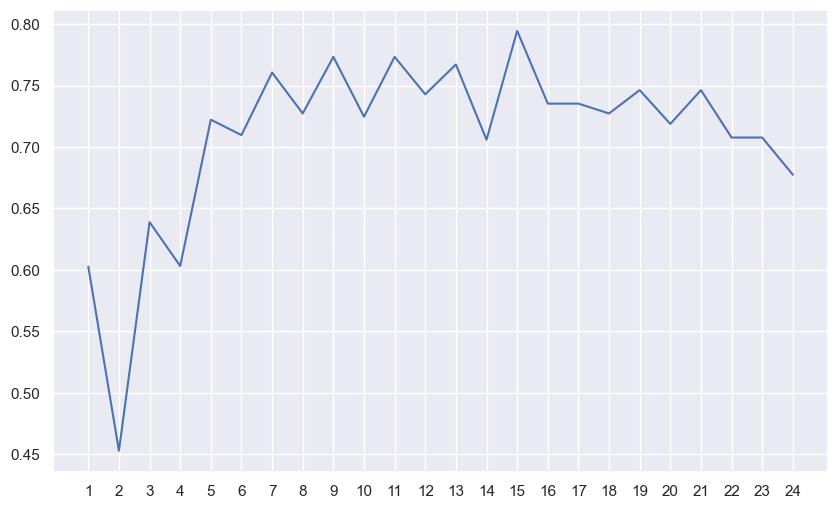

In [139]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, Y_train)
    Y_predict = knn.predict(X_test)
    f1.append(f1_score(Y_test, Y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.show()